In [2]:
#%%
"""
Created in may 2024
Monte Carlo Paths for the CIR Process
@author: Antoine de Saint-Afrique
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

---

### Cox Ingersoll Ross model

$$
\begin{align*}
dr(t) &= \lambda (\theta - r(t)) dt + \gamma \sqrt{r(t)} dW(t)
\end{align*}
$$

In [2]:
def CIRpaths(NoOfPaths, NoOfSteps, lam, theta, gamma, T, r_0):
    """Function that performs the Euler scheme on the truncated and reflected CIR process and returns the arrays of time and truncated and reflected paths as a dictionary."""
    r_trunc = np.zeros([NoOfPaths, NoOfSteps+1])
    r_reflec = np.zeros([NoOfPaths, NoOfSteps+1])
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    time = np.zeros([NoOfSteps+1])

    dt = T / float(NoOfSteps)
    
    r_trunc[:,0] = r_0
    r_reflec[:,0] = r_0
    
    Z = (Z - Z.mean(axis=0)) / Z.std(axis=0) if NoOfPaths>1 else Z

    for i in range(0,NoOfSteps):
        r_trunc[:,i+1] = np.maximum(r_trunc[:,i] + lam*(theta - r_trunc[:,i]) * dt + gamma * np.sqrt(dt*r_trunc[:,i]) * Z[:,i],0)
        r_reflec[:,i+1] = np.absolute(r_reflec[:,i] + lam*(theta - r_reflec[:,i]) * dt + gamma * np.sqrt(dt*r_reflec[:,i]) * Z[:,i])

        time[i+1] = time[i] + dt

    return {'time': time, 'r_trunc':r_trunc, 'r_reflec':r_reflec}

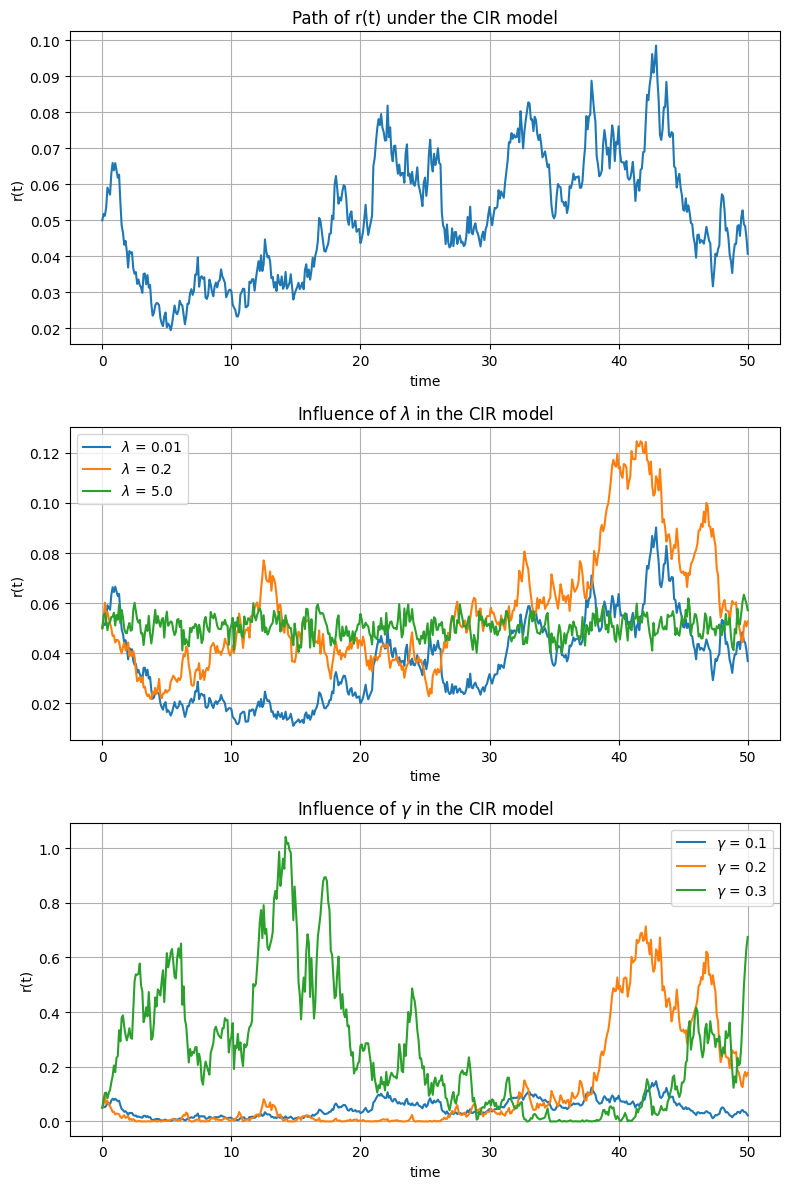

In [3]:
np.random.seed(42)
NoOfPaths = 1
NoOfSteps = 500
lam = .1
theta = .05
gamma = .05
T = 50
r_0 = .05

paths = CIRpaths(NoOfPaths, NoOfSteps, lam, theta, gamma, T, r_0)
timeGrid = paths['time']
r = paths['r_trunc']

fig, axs = plt.subplots(3, 1, figsize=(8, 12))

axs[0].plot(timeGrid, np.transpose(r))
axs[0].set_title(f'Path{"s" if NoOfPaths > 1 else ""} of r(t) under the CIR model')
axs[0].grid()
axs[0].set_xlabel("time")
axs[0].set_ylabel("r(t)")

np.random.seed(42)
lamVec = [.01, .2, 5.0]
timeGrid = np.linspace(0, T, NoOfSteps+1)
for lam in lamVec:
    Paths = CIRpaths(NoOfPaths, NoOfSteps, lam, theta, gamma, T, r_0)
    r = Paths['r_trunc']
    axs[1].plot(timeGrid, np.transpose(r), label=rf'$\lambda$ = {lam}')
axs[1].grid()
axs[1].set_title(rf'Influence of $\lambda$ in the CIR model')
axs[1].set_xlabel("time")
axs[1].set_ylabel("r(t)")
axs[1].legend()

np.random.seed(42)
lam = .1
gammaVec = [.1, .2, .3]
timeGrid = np.linspace(0, T, NoOfSteps+1)
for gamma in gammaVec:
    Paths = CIRpaths(NoOfPaths, NoOfSteps, lam, theta, gamma, T, r_0)
    r = Paths['r_trunc']
    axs[2].plot(timeGrid, np.transpose(r), label=rf'$\gamma$ = {gamma}')
axs[2].grid()
axs[2].set_title(f'Influence of $\gamma$ in the CIR model')
axs[2].set_xlabel("time")
axs[2].set_ylabel("r(t)")
axs[2].legend()

plt.tight_layout()
plt.show()

---

### Vasicek model

$$
\begin{align*}
dr(t) &= \lambda (\theta - r(t)) dt + \eta dW(t)
\end{align*}
$$

In [4]:
def VasicekPaths(NoOfPaths, NoOfSteps, lam, theta, eta, T, r_0):
    """Function that performs the Euler scheme on the Vasicek process and returns the arrays of time and interest rate paths as a dictionary."""
    r = np.zeros([NoOfPaths, NoOfSteps+1])
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    time = np.zeros([NoOfSteps+1])

    dt = T / float(NoOfSteps)
    
    r[:,0] = r_0
    
    Z = (Z - Z.mean(axis=0)) / Z.std(axis=0) if NoOfPaths>1 else Z

    for i in range(0,NoOfSteps):
        r[:,i+1] = r[:,i] + lam*(theta - r[:,i])*dt + eta*np.sqrt(dt)*Z[:,i]
        
        time[i+1] = time[i] + dt

    return {'time': time, 'r':r}

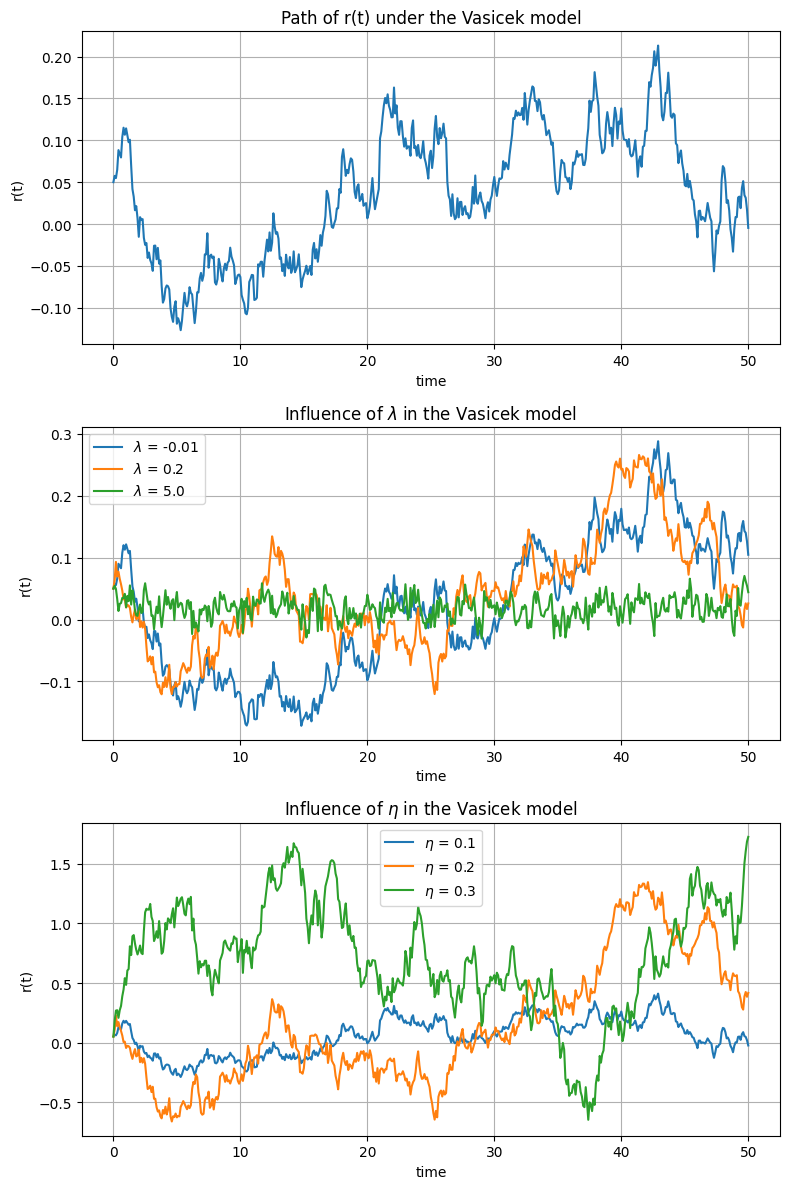

In [5]:
np.random.seed(42)
NoOfPaths = 1
NoOfSteps = 500
lam = .1
theta = .015
eta = .05
T = 50
r_0 = .05

paths = VasicekPaths(NoOfPaths, NoOfSteps, lam, theta, eta, T, r_0)
timeGrid = paths['time']
r = paths['r']

fig, axs = plt.subplots(3, 1, figsize=(8, 12))

axs[0].plot(timeGrid, np.transpose(r))
axs[0].set_title(f'Path{"s" if NoOfPaths > 1 else ""} of r(t) under the Vasicek model')
axs[0].grid()
axs[0].set_xlabel("time")
axs[0].set_ylabel("r(t)")

np.random.seed(42)
lamVec = [-.01, .2, 5.0]
timeGrid = np.linspace(0, T, NoOfSteps+1)
for lam in lamVec:
    Paths = VasicekPaths(NoOfPaths, NoOfSteps, lam, theta, eta, T, r_0)
    r = Paths['r']
    axs[1].plot(timeGrid, np.transpose(r), label=rf'$\lambda$ = {lam}')
axs[1].grid()
axs[1].set_title(f'Influence of $\lambda$ in the Vasicek model')
axs[1].set_xlabel("time")
axs[1].set_ylabel("r(t)")
axs[1].legend()

np.random.seed(42)
lam = .1
etaVec = [.1, .2, .3]
timeGrid = np.linspace(0, T, NoOfSteps+1)
for eta in etaVec:
    Paths = VasicekPaths(NoOfPaths, NoOfSteps, lam, theta, eta, T, r_0)
    r = Paths['r']
    axs[2].plot(timeGrid, np.transpose(r), label=rf'$\eta$ = {eta}')
axs[2].grid()
axs[2].set_title(f'Influence of $\eta$ in the Vasicek model')
axs[2].set_xlabel("time")
axs[2].set_ylabel("r(t)")
axs[2].legend()

plt.tight_layout()
plt.show()

### Exponential Vasicek model

$$
\begin{align*}
dr(t) &= \lambda (\theta - r(t)) dt + \eta dW(t)\\
\hat{r}(t) &= e^{r(t)}\\
\\
d\hat{r}(t) &= \hat{r}(t) \left( \frac{\theta}{\lambda} + \frac{\eta^2}{2} - \lambda \ln(\hat{r}(t)) \right) dt + \eta \hat{r}(t) dW(t)

\end{align*}
$$

$\hat{r}$ follows the exponential Vasicek model. To allow $\hat{r}$ to take negative values, we can use the shifted exponential Vasicek model :
$$
\begin{align*}
\tilde{r}(t) &= \hat{r}(t) - \zeta , \quad \zeta \in \mathbb{R}^+
\end{align*}
$$

Hence the following dynamics for $\tilde{r}$:

$$
\begin{align*}
d\tilde{r}(t) &= (\tilde{r}(t)+\zeta) \left( \frac{\theta}{\lambda} + \frac{\eta^2}{2} - \lambda \ln(\tilde{r}(t)+\zeta) \right) dt + \eta (\tilde{r}(t)+\zeta) dW(t)
\end{align*}
$$

In [3]:
def exponential_Vasicek_Paths(NoOfPaths, NoOfSteps, lam, theta, eta, zeta, T, r_0):
    """Function that performs the Euler scheme on the shifted exponential Vasicek process and returns the arrays of time and interest rate paths as a dictionary."""
    r = np.zeros([NoOfPaths, NoOfSteps+1]) 
    Z = np.random.normal(0.0, 1.0, [NoOfPaths, NoOfSteps]) 
    time = np.zeros([NoOfSteps+1]) 

    dt = T / float(NoOfSteps)  
    
    r[:, 0] = r_0 
    
    Z = (Z - Z.mean(axis=0)) / Z.std(axis=0) if NoOfPaths > 1 else Z

    for i in range(0, NoOfSteps):
        r[:, i+1] = r[:, i] + (r[:, i]+zeta) * (theta/lam + (eta**2)/2 - lam * np.log(r[:, i]+zeta)) * dt + eta * (r[:, i]+zeta) * np.sqrt(dt) * Z[:, i]
        
        time[i+1] = time[i] + dt 

    return {'time': time, 'r': r}

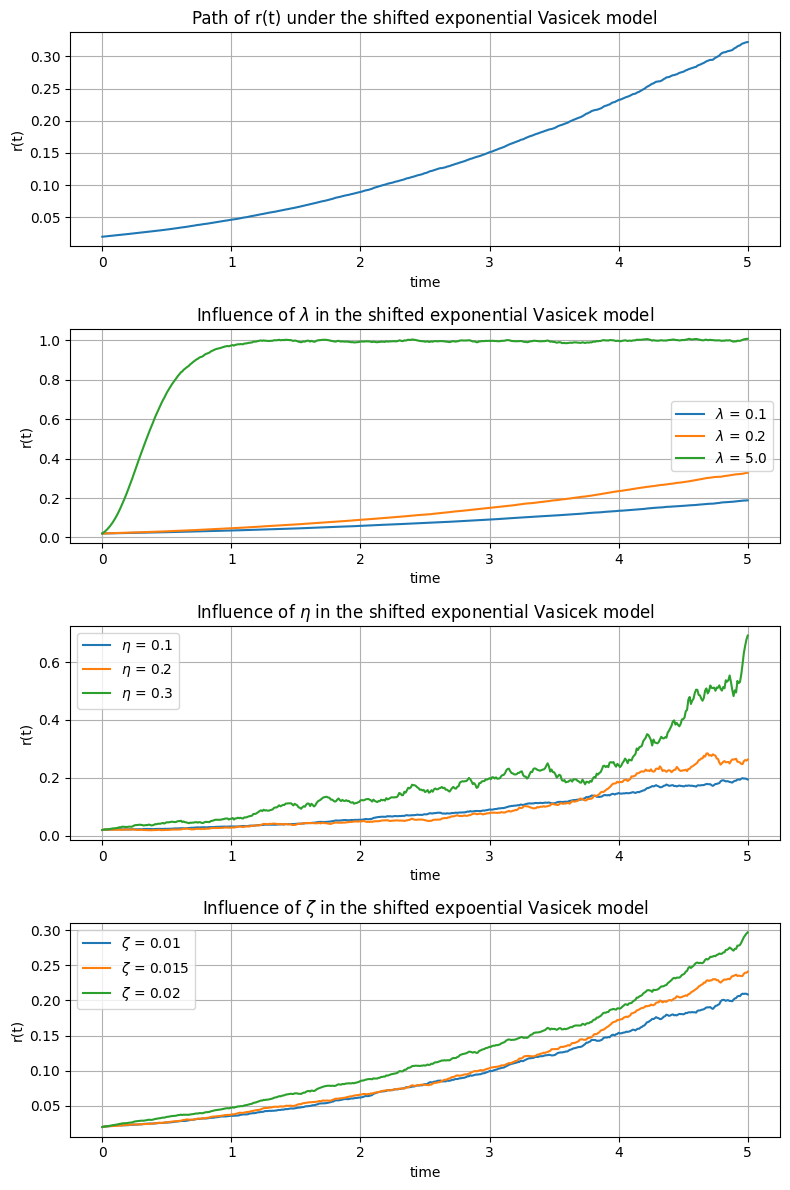

In [15]:
np.random.seed(42)
NoOfPaths = 1
NoOfSteps = 500
lam = .2
theta = .015
eta = .015
zeta = .005
T = 5
r_0 = .02

paths = exponential_Vasicek_Paths(NoOfPaths, NoOfSteps, lam, theta, eta, zeta, T, r_0)
timeGrid = paths['time']
r = paths['r']

fig, axs = plt.subplots(4, 1, figsize=(8, 12))

axs[0].plot(timeGrid, np.transpose(r))
axs[0].set_title(f'Path{"s" if NoOfPaths > 1 else ""} of r(t) under the shifted exponential Vasicek model')
axs[0].grid()
axs[0].set_xlabel("time")
axs[0].set_ylabel("r(t)")

np.random.seed(42)
lamVec = [.1, .2, 5.0]
timeGrid = np.linspace(0, T, NoOfSteps+1)
for lam in lamVec:
    Paths = exponential_Vasicek_Paths(NoOfPaths, NoOfSteps, lam, theta, eta, zeta, T, r_0)
    r = Paths['r']
    axs[1].plot(timeGrid, np.transpose(r), label=rf'$\lambda$ = {lam}')
axs[1].grid()
axs[1].set_title(f'Influence of $\lambda$ in the shifted exponential Vasicek model')
axs[1].set_xlabel("time")
axs[1].set_ylabel("r(t)")
axs[1].legend()

np.random.seed(42)
lam = .1
etaVec = [.1, .2, .3]
timeGrid = np.linspace(0, T, NoOfSteps+1)
for eta in etaVec:
    Paths = exponential_Vasicek_Paths(NoOfPaths, NoOfSteps, lam, theta, eta, zeta, T, r_0)
    r = Paths['r']
    axs[2].plot(timeGrid, np.transpose(r), label=rf'$\eta$ = {eta}')
axs[2].grid()
axs[2].set_title(f'Influence of $\eta$ in the shifted exponential Vasicek model')
axs[2].set_xlabel("time")
axs[2].set_ylabel("r(t)")
axs[2].legend()

np.random.seed(42)
lam = .1
eta = .05
zetaVec = [.01, .015, .02]
timeGrid = np.linspace(0, T, NoOfSteps+1)
for zeta in zetaVec:
    Paths = exponential_Vasicek_Paths(NoOfPaths, NoOfSteps, lam, theta, eta, zeta, T, r_0)
    r = Paths['r']
    axs[3].plot(timeGrid, np.transpose(r), label=rf'$\zeta$ = {zeta}')
axs[3].grid()
axs[3].set_title(f'Influence of $\zeta$ in the shifted expoential Vasicek model')
axs[3].set_xlabel("time")
axs[3].set_ylabel("r(t)")
axs[3].legend()

plt.tight_layout()
plt.show()